In [44]:
import os
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

Created by Daniel Ryan, adoped from https://analyticsindiamag.com/hands-on-guide-to-word-embeddings-using-glove/

This short program is to demostrate the function and mechanics of GLoVe, which is an algorithm that is for generating word embeddings. Unlike ELMo, however, there is no model or algorithm that needs to be used, as 6 billion words have already been compiled into various text files by the authors of GLoVe in order to be easily used. The actual mechanics of how these vectors were calculated, in order to most accurately represent the different nuances of the english language, is by basically keeping track of what words are most often seen together when reading through a large amount of data. Because of this, we can actually reverse engineer these features of GLoVe to create a simple function to return the most similar words to a given words by sorting the words by their euclidean distance from the given word.

This simple kind of function cannot be easily translated to more recent language models such as ELMo or BERT/RoBERTa as these models do not contain a definite vocabulary, but serve as complex algorithms that can generate word/token representations. For ELMo, the vocabulary that the model can create an embedding for is theoreticlaly infinite (however, it does work best against words it has encountered in training), so creating a definite list of similar words is impossible. However, if ELMo is trained on a given text dataset with a definite vocabulary, a similar calculation as show with GLoVe can be done to determine similar words from within the predermined vocabulary. BERT, on the other hand, is more complex. BERT does not create embeddings on words, but rather tokens, which depending on the tokenizer, may or may not represent a word. In the end, this does make more complex tasks, such as sentence completion or question answering, within the realm of possibility, despite not containing a definite vocabulary to analyze. 

This code uses the 200 dimentional GLoVe embedding, meaning each word has a vector sized 200 elements to describe it. Here we extract the embeddings from the text file and store it into a dictionary.

In [2]:
word_dict = {}
with open('data/glove.6B.200d.txt', 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        word_dict[word] = vector
    

Here we can see an example of an embedding, this one is for the word 'america'

In [3]:
word_dict['america']

array([ 0.024357 ,  0.47495  ,  0.24024  , -0.2719   , -0.44414  ,
        0.45649  , -0.35285  ,  0.18439  , -0.15883  , -0.099209 ,
        0.38154  ,  0.32182  , -0.16037  ,  0.15453  ,  0.26574  ,
        0.43576  , -0.37983  ,  0.20988  , -0.0049928,  0.39781  ,
        1.1306   ,  2.0803   , -0.6889   , -0.023665 ,  0.29376  ,
        0.47292  ,  0.28467  , -0.047959 ,  0.17156  ,  0.19228  ,
        0.58266  ,  0.049255 , -0.15629  , -0.40842  , -0.57001  ,
        0.17365  , -0.62292  ,  0.068309 ,  0.46321  , -0.095304 ,
       -0.41847  ,  0.066862 ,  0.14038  ,  0.29172  , -0.39597  ,
        0.0043099,  0.36998  ,  0.030957 ,  0.093858 ,  0.13629  ,
        0.090644 , -0.043322 ,  0.20663  ,  0.30374  ,  0.38392  ,
        0.2151   , -0.39579  , -0.32411  ,  0.12548  ,  0.082837 ,
        0.25136  ,  0.070659 , -0.34356  ,  0.060842 ,  0.49237  ,
        0.54927  ,  0.42943  ,  0.87282  ,  0.23039  , -0.58727  ,
        0.4656   , -0.02627  ,  0.46514  ,  0.65133  , -0.0201

Here we use euclidean distance to sort all the words based on how similar it is to a given word. Euclidean distance is used to calculate the distance between 2 words, allowing us to easily sort.

In [4]:
def find_similar_words(embedding):
    nearest = sorted(word_dict.keys(), key=lambda word: spatial.distance.euclidean(word_dict[word], embedding))
    return nearest

the downsides to having a definite vocabulary is the fact that many words might be missing from the embeddings list, despite it containing 6 billion words. Nevertheless, we can find the most similar words to any word that is contained the in the vocabulary

In [5]:
find_similar_words(word_dict['drink'])[0:10]

['drink',
 'drinks',
 'drinking',
 'beer',
 'drank',
 'beverages',
 'beverage',
 'liquor',
 'bottled',
 'soda']

We can also input multiple words in order to further filter for similar words. 

In [6]:
find_similar_words(word_dict['queen'] + word_dict['prince'] + word_dict['king'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'crown',
 'throne',
 'royal',
 'monarch',
 'kingdom',
 'duke']

In [30]:
len(find_similar_words(word_dict['drink']))

400000

Finally, we can visualize the embeddings and their relative distances using matplotlib. First, we have to reduce the dimentions of the data from 200 to 2, in order to graph the embeddings on a 2d plane. Here, we use TSNE (but it might be better to use PCA, we'll see). Then, we can simply plot all the points on a scattar plot thanks to matplotlib.

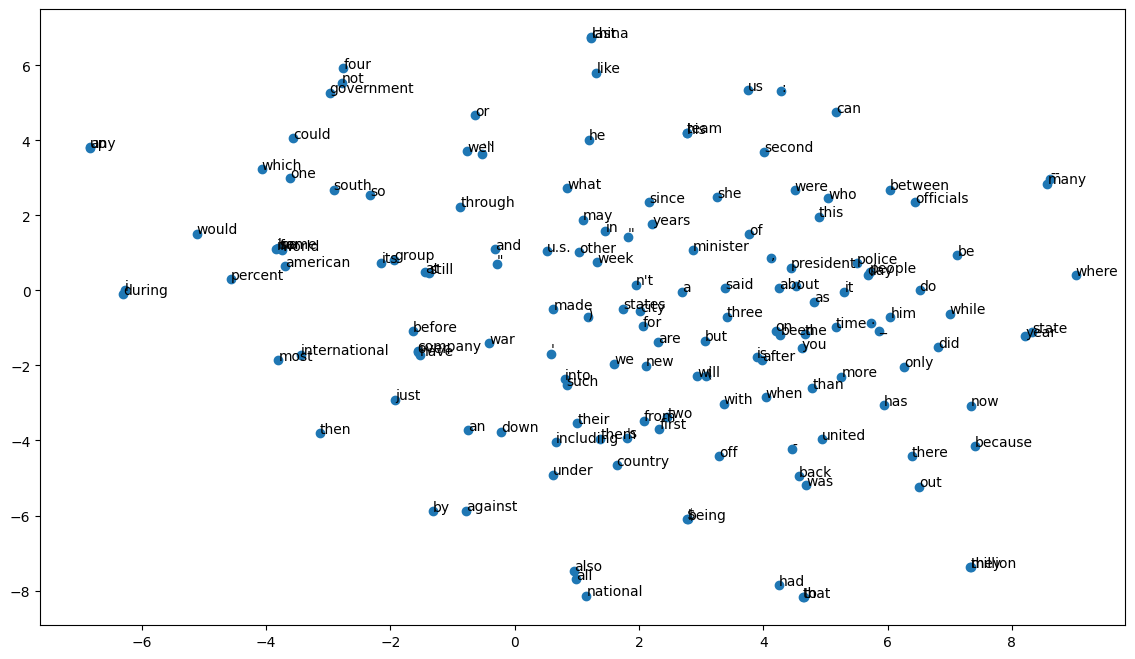

In [7]:
distri = TSNE(n_components=2)
words = list(word_dict.keys())
vectors = np.array([word_dict[word] for word in words])
y = distri.fit_transform(vectors[100:250])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]): plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

Now lets generate a graph of the top 50 most similar words to a given word, using the find_similar_words() function. 

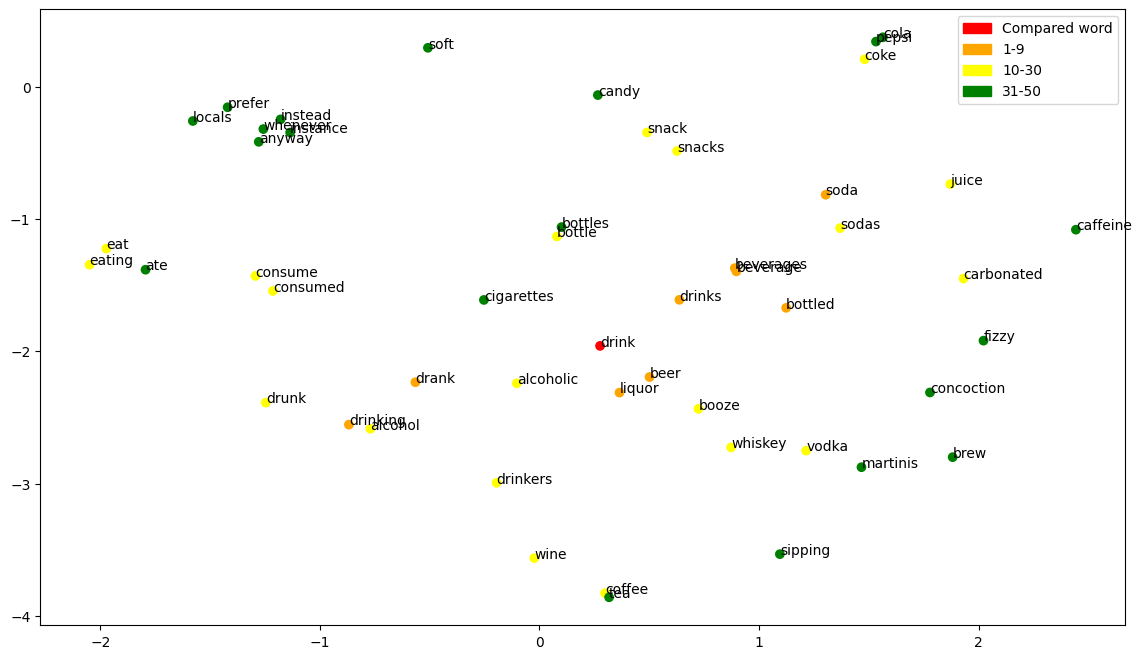

In [46]:
words = find_similar_words(word_dict['drink'])
vectors = np.array([word_dict[word] for word in words])
y = distri.fit_transform(vectors[0:50])
colors = ['red']*1 + ['orange']*9 + ['yellow']*20 + ['green']*20

plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1], color=colors)
red_patch = mpatches.Patch(color='red', label='Compared word')
orange_patch = mpatches.Patch(color='orange', label='1-9')
yellow_patch = mpatches.Patch(color='yellow', label='10-30')
green_patch = mpatches.Patch(color='green', label='31-50')
plt.legend(handles=[red_patch, orange_patch, yellow_patch, green_patch])
for label,x,y in zip(words,y[:, 0],y[:,1]): plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

As we can see, the plot isn't exactly the most accurate in terms of showing the precise distances between words, but this is because we are using T-SNE to bring the dimentions from 200 to 2. This operation will lose a lot of data. Nevertheless, we can still see generally how similar words compare to each other in GLoVe.